In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
import calendar
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


In [3]:
df_train = pd.read_csv('/Users/ghannesh59/Downloads/train.csv',nrows=10000)
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df_train.shape

(10000, 8)

In [5]:
df_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [7]:
df_test=pd.read_csv('/Users/ghannesh59/Downloads/test.csv')
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [8]:
df_test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Fare Amount')

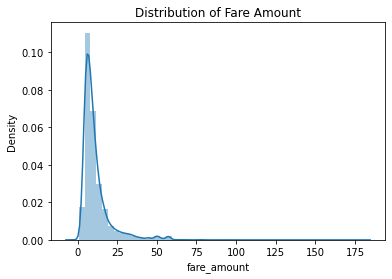

In [9]:
sns.distplot(df_train['fare_amount'])
plt.title('Distribution of Fare Amount')

## 1. Removing all the taxi trips which has negative fare amount.


In [10]:
#Remove data which has the fare amount negative.
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' % len(df_train))

Old size: 10000
New size: 9998


## 2.Removing taxi trips that have missing data.

In [11]:
#count of missing data with respect to attributes:
print(df_train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [12]:
#Removing the records with missing data.
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))


Old size: 9998
New size: 9998


## 3. Removing taxi trips those have passenger count less than zero and greater than six.

In [13]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.passenger_count<=6]
df_train = df_train[df_train.passenger_count>0]
print('New size: %d' % len(df_train))

Old size: 9998
New size: 9960


/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


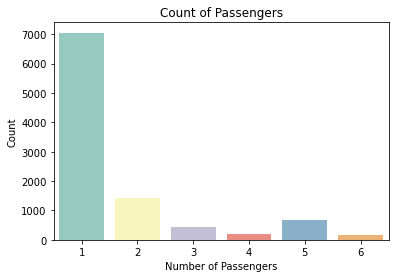

In [14]:
passenger = df_train.groupby(['passenger_count']).count()
sns.barplot(passenger.index, passenger['key'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

In [15]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [16]:
def groupandplot(data,groupby_key,value,aggregate='mean'):
    #plt.figure(figsize=(16,10))
    agg_data=data.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    #plt.subplot(1,2,1)
    #count_data=train_df.groupby([groupby_key])['key'].count().reset_index().rename(columns={'key':'Num_Trips'})
    #sns.barplot(x=groupby_key,y='Num_Trips',data=count_data).set_title("Number of Trips vs "+groupby_key)
    
    #plt.subplot(1,2,2)
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)

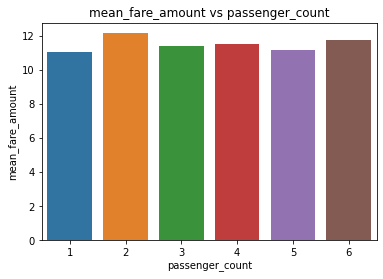

In [17]:
groupandplot(df_train,'passenger_count','fare_amount')

## 4. Removing taxi trips having zero feature value which is not useful.

In [18]:
print('Old size: %d' % len(df_train))
df_train = df_train.loc[~(df_train == 0).any(axis=1)]
print('New size: %d' % len(df_train))

Old size: 9960
New size: 9764


## Converting the pickup_datetime attribute of type Object to different primitive types using lambda functions.

In [19]:
df_train['pickup_datetime']=pd.to_datetime(df_train['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

df_train['pickup_date']= df_train['pickup_datetime'].dt.date
df_train['pickup_day']=df_train['pickup_datetime'].apply(lambda x:x.day)
df_train['pickup_hour']=df_train['pickup_datetime'].apply(lambda x:x.hour)
df_train['pickup_day_of_week']=df_train['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_train['pickup_month']=df_train['pickup_datetime'].apply(lambda x:x.month)
df_train['pickup_year']=df_train['pickup_datetime'].apply(lambda x:x.year)

## Statistical Visualizations using Matplotlib

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Week')

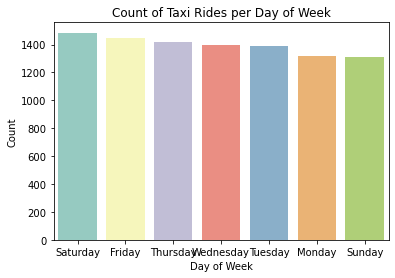

In [20]:
day_count = df_train.groupby(['pickup_day_of_week']).count().sort_values(by = 'key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Week')

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Month')

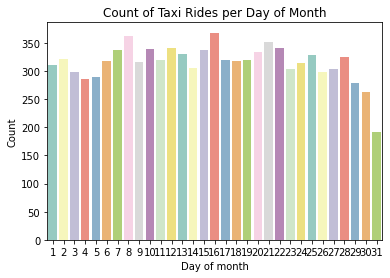

In [21]:
day_count = df_train.groupby(['pickup_day']).count().sort_values(by = 'key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Month')

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Fare Amount per Day of Week')

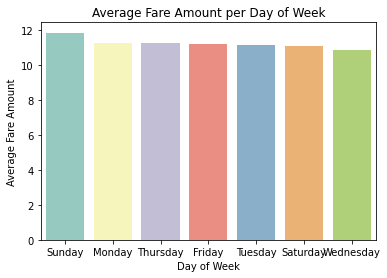

In [22]:
day_fare = df_train.groupby(['pickup_day_of_week']).mean().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_fare.index, day_fare.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount per Day of Week')

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Total Rides Given During Each Day')

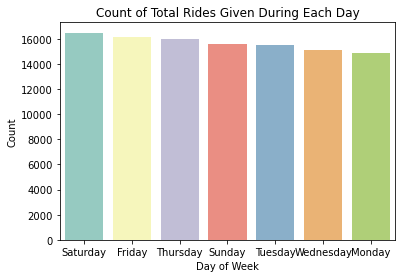

In [23]:
day_sum = df_train.groupby(['pickup_day_of_week']).sum().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_sum.index, day_sum.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Total Rides Given During Each Day')

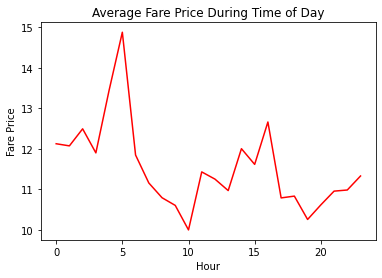

In [24]:
time_of_day = df_train.groupby(['pickup_hour']).mean()
plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')
plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


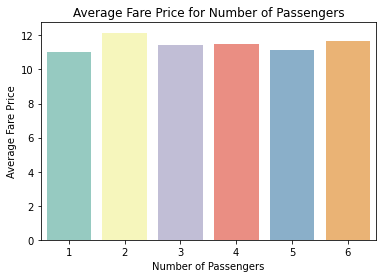

In [25]:
passenger_fare = df_train.groupby(['passenger_count']).mean()
sns.barplot(passenger_fare.index, passenger_fare['fare_amount'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [26]:
#let us convert day of the week to int datatyp
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [27]:
df_train['pickup_day_of_week']=df_train['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [28]:
df_train.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_date                   object
pickup_day                     int64
pickup_hour                    int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_year                    int64
dtype: object

In [29]:
#dropping the unnecessary data
df_train = df_train.drop(['key','pickup_datetime','pickup_date'], axis=1)
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


## Location Data

As we're dealing with location data, We want to plot the coordinates on a map. This gives a better view of the data. For this, We use the following website:

* Calculate distance between locations: https://www.travelmath.com/flying-distance/

* Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

* we have taken the boundary box [long_min, long_max, latt_min, latt_max] of New York city using website: *https://www.mapdevelopers.com/geocode_bounding_box.php*

*North Latitude: 40.917577 South Latitude: 40.477399 East Longitude: -73.700272 West Longitude: -74.259090*

*This way, we are sure to train a model for the full pickup/dropoff coordinate range.* 

In [30]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.4729, -72.7987, 40.4901, 41.8138)
# BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('nymapzout.png')

In [31]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train, BB)]
print('New size: %d' % len(df_train))

Old size: 9764
New size: 9749


In [32]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

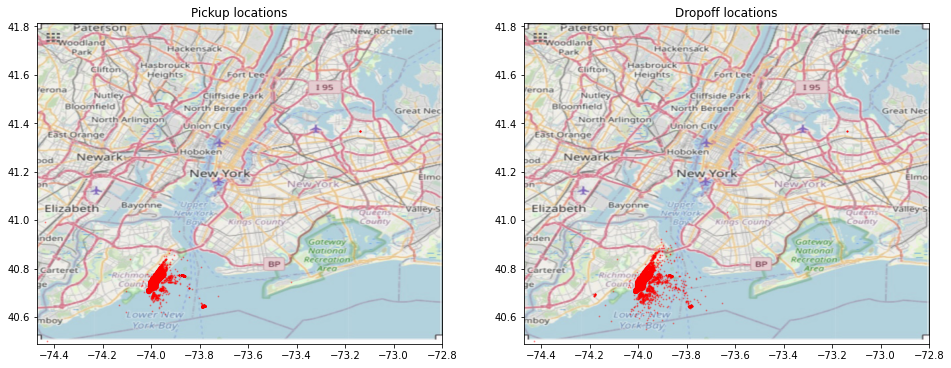

In [33]:
# plot training data on map
plot_on_map(df_train, BB, nyc_map, s=1, alpha=0.3)

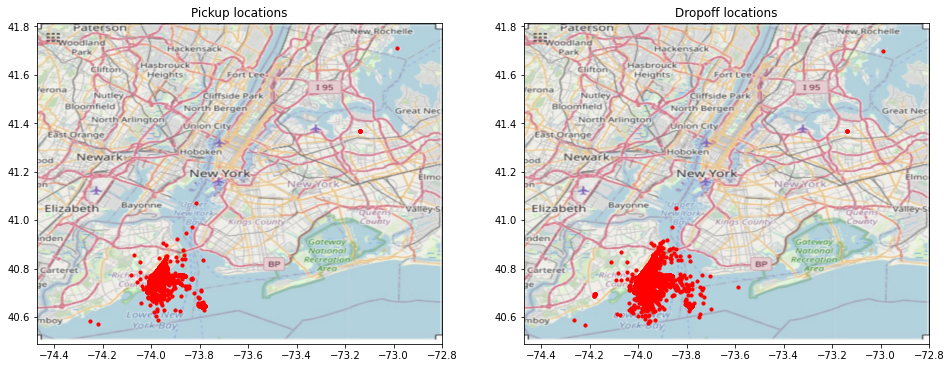

In [34]:
# plot test data on map
plot_on_map(df_test, BB, nyc_map, alpha=1.0, s=10)

## This is how the dataset looks after initial analysis and feature engineering on the pickup_date_time

In [35]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


## Calculate distance between coordinates with the hypothesis being fare increases with increase in distance

In [36]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [37]:
df_train['trip_distance']=df_train.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude']
                                                             ,row['pickup_longitude'],row['dropoff_longitude']),axis=1)

Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

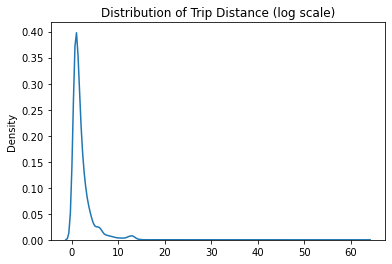

In [38]:
sns.kdeplot(df_train['trip_distance'].values).set_title("Distribution of Trip Distance (log scale)")

Text(3.674999999999997, 0.5, 'Taxi Fare')

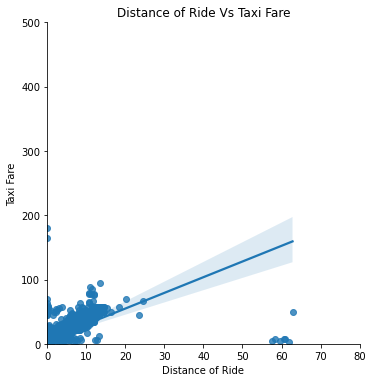

In [39]:
a_plot=sns.lmplot(x='trip_distance', y='fare_amount',data=df_train)
a_plot.set(xlim=(0, 80))
a_plot.set(ylim=(0, 500))

plt.title('Distance of Ride Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Distance of Ride')
# Set y-axis label
plt.ylabel('Taxi Fare')

In [40]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218


In [41]:
long_trips=df_train[df_train['trip_distance']>=50]

## Fetching NYC coordinates and dividing the city into burroughs which provides us with new features being pickup and dropoff burroughs

In [42]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490
        
    }  
}

In [43]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [44]:
df_train['pickup_borough']=df_train.apply(lambda row:getBorough(row['pickup_latitude'],row['pickup_longitude']),axis=1)
df_train['dropoff_borough']=df_train.apply(lambda row:getBorough(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

## Statistical analysis of burroughs by count and also the average fare amount and distance across each burrough

Text(0.5, 1.0, 'Distribution of Pickup Boroughs')

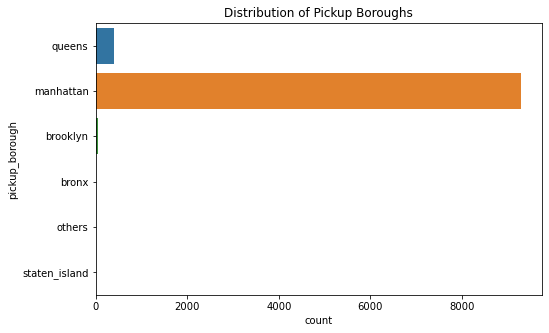

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(y=df_train['pickup_borough'])
plt.title("Distribution of Pickup Boroughs")

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


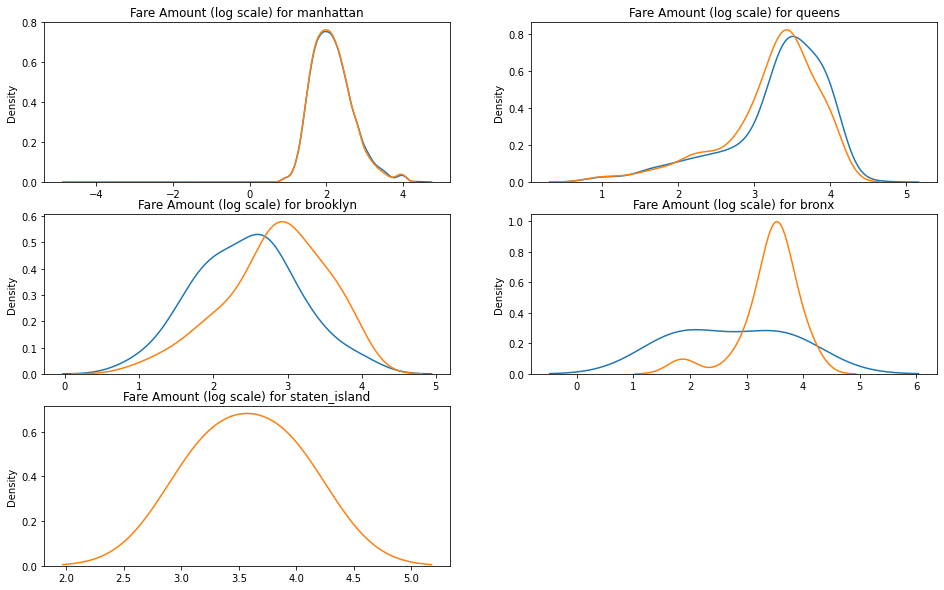

In [46]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(df_train.loc[df_train['pickup_borough']==key,'fare_amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(df_train.loc[df_train['dropoff_borough']==key,'fare_amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    i=i+1

/Users/ghannesh59/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


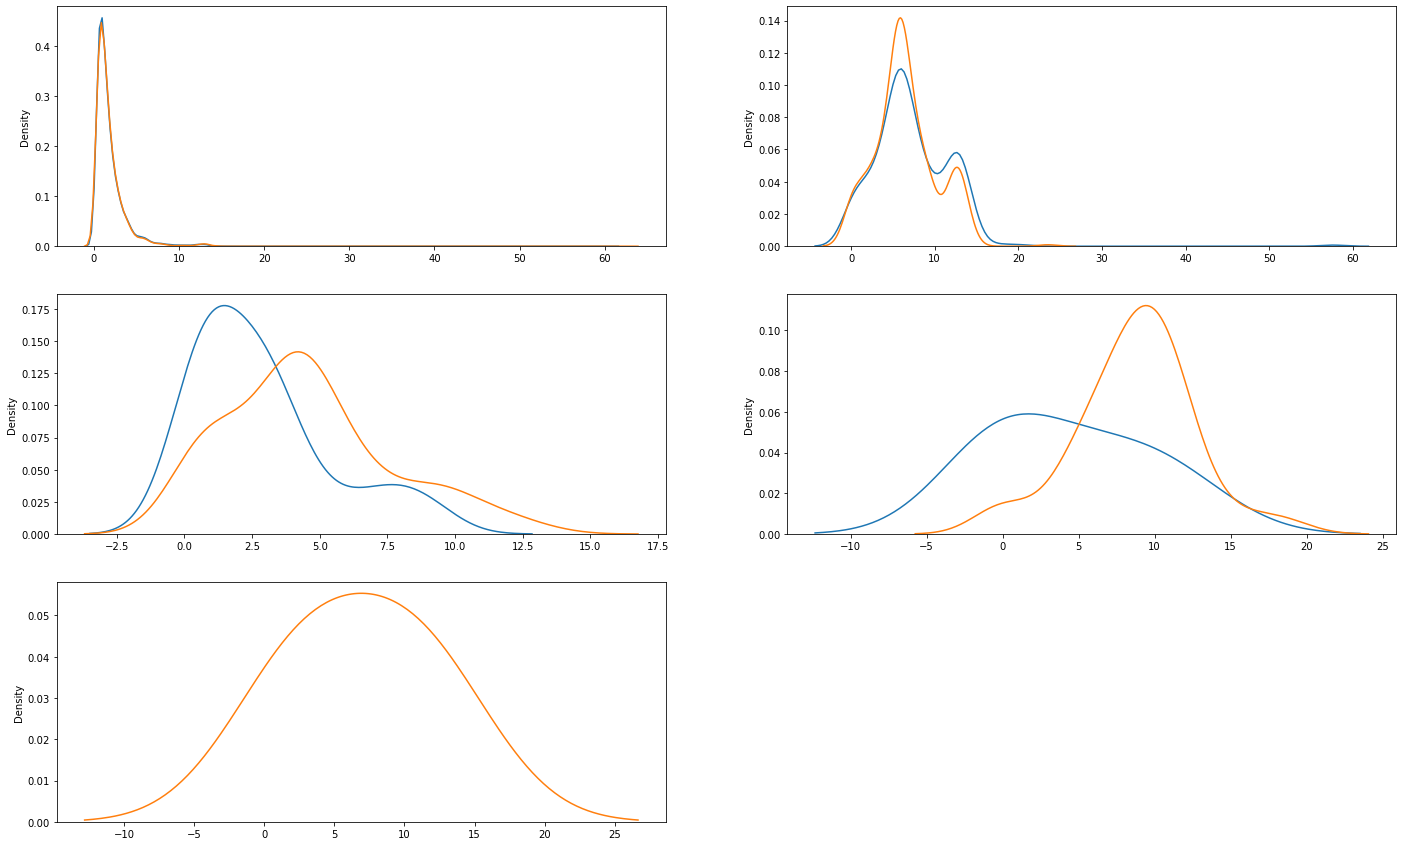

In [47]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(df_train.loc[df_train['pickup_borough']==key,'trip_distance'].values,label='Pickup '+ key)
    sns.kdeplot(df_train.loc[df_train['dropoff_borough']==key,'trip_distance'].values,label='Dropoff'+ key).set_title
    ("Trip Distance (log) for "+key)
    i=i+1

In [48]:
lower_manhattan_boundary={'min_lng': -74.0194,
                          'min_lat':40.6997,
                          'max_lng':-73.9716,
                          'max_lat':40.7427}

def isLowerManhattan(lat,lng):
    if lat>=lower_manhattan_boundary['min_lat'] and lat<=lower_manhattan_boundary['max_lat'] and lng>=lower_manhattan_boundary['min_lng'] and lng<=lower_manhattan_boundary['max_lng']:
        return 1
    else:
        return 0

In [49]:
df_train['is_pickup_lower_manhattan']=df_train.apply(lambda row:isLowerManhattan(row['pickup_latitude'],row['pickup_longitude']),axis=1)
df_train['is_dropoff_lower_manhattan']=df_train.apply(lambda row:isLowerManhattan(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [50]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487,queens,queens,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670,manhattan,manhattan,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411,manhattan,manhattan,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386,manhattan,manhattan,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218,manhattan,manhattan,0,0


## Dividing trips by pickup and dropoff to airports as it was found that some coordinates having constant fare amount were the 3 airports in and around NYC

In [51]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [52]:
df_train['is_pickup_JFK']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
df_train['is_dropoff_JFK']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)

In [53]:
df_train['is_pickup_EWR']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
df_train['is_dropoff_EWR']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)

In [54]:
df_train['is_pickup_la_guardia']=df_train.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
df_train['is_dropoff_la_guardia']=df_train.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

In [55]:
mean=np.mean(df_train['pickup_hour'].value_counts())
dev=np.std(df_train['pickup_hour'].value_counts())
taxi_count=df_train['pickup_hour'].value_counts()
m1=mean-dev
m2=mean+dev

In [56]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df_train["pickup_borough"] = number.fit_transform(df_train["pickup_borough"].astype('str'))
df_train["dropoff_borough"] = number.fit_transform(df_train["dropoff_borough"].astype('str'))

In [57]:
X=df_train.drop(['fare_amount','is_pickup_EWR','passenger_count','pickup_day','pickup_hour','pickup_month'],axis=1)
y=df_train['fare_amount']
print(df_train.corr('pearson')['fare_amount'])

fare_amount                   1.000000
pickup_longitude              0.315821
pickup_latitude              -0.166495
dropoff_longitude             0.260317
dropoff_latitude             -0.140616
passenger_count               0.014306
pickup_day                   -0.002193
pickup_hour                  -0.034150
pickup_day_of_week           -0.016683
pickup_month                  0.040920
pickup_year                   0.099527
trip_distance                 0.698008
pickup_borough                0.451851
dropoff_borough               0.341466
is_pickup_lower_manhattan    -0.040435
is_dropoff_lower_manhattan   -0.085204
is_pickup_JFK                 0.402166
is_dropoff_JFK                0.323654
is_pickup_EWR                      NaN
is_dropoff_EWR                0.236048
is_pickup_la_guardia          0.281564
is_dropoff_la_guardia         0.236729
Name: fare_amount, dtype: float64


## Final dataset after completing feature engineering

In [160]:
X.head()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day_of_week,pickup_year,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan,is_pickup_JFK,is_dropoff_JFK,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia
0,-73.844311,40.721319,-73.841610,40.712278,1,2009,0.640487,4,4,0,0,0,0,0,0,0
1,-74.016048,40.711303,-73.979268,40.782004,2,2010,5.250670,2,2,1,0,0,0,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,4,2011,0.863411,2,2,0,0,0,0,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,6,2012,1.739386,2,2,1,0,0,0,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,2,2010,1.242218,2,2,0,0,0,0,0,0,0


In [161]:
X.shape

(9749, 16)

## my cost function
    The cost function i used is:https://alex.smola.org/papers/2004/SmoSch04.pdf
    it is under section 1.2(3)
 

In [143]:
def linear_support_vector_regression(x,y,X_test,learning_rate,epsilon,c,iters=1000):
    n_samples,n_features=X_train.shape
    w=np.zeros((X_train.shape[1],1))
    b=0
    v1=[]
    v2=[]
    for i in range(X_train.shape[0]):
        if np.abs(y_train[i]-np.dot(X_train[i],w)+b)<=epsilon:
            v1.append(X_train[i])#this list of elements don't get penalized
        else:
            v2.append(X_train[i])#this list of elements get penalized
    for iters in range(iters):#performing gradient descent
        temp1=np.sum(v2,axis=1)
        temp1=np.resize(temp1,(16,1))
        dw=w+(c*temp1)#derivation of my cost function w.r.t to dw
        db=c#derivation of my cost function w.r.t to db
        w=w-learning_rate*dw
        b=b-learning_rate*db
    y_pred=(np.dot(X_test,w)+b)
    return y_pred

### performing K-fold with splits=5

In [164]:
cv=KFold(n_splits=5, random_state=None, shuffle=False)
linear_svr_scores=[]
for train_index, test_index in cv.split(X):
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    X_train=np.array(X_train)
    y_train=np.array(y_train)
    X_test=np.array(X_test)
    scx = StandardScaler()#standardizing the features
    X_train = scx.fit_transform(X_train)
    X_test = scx.transform(X_test)
    y_pred=linear_support_vector_regression(X_train,y_train,X_test,learning_rate=0.0001,epsilon=1,c=10,iters=1000)#calling my prediction function
    r2_score(y_test,y_pred) 
linear_svr_scores.append(r2_score(y_test,y_pred))
print(np.mean(linear_svr_scores))


-0.22646600645076043


#### The r2_score is very low because the data set is very high dimensional(16) and we didn't use any kernel functions to operate on the high dimensional data.So,r2_score will be definitely low for a linear svr without any kernel functions

### Here I predicted r2_score with different values of regulariztion parameter 'c'

In [165]:
c_1=[2,4,6,8,10]#different values of c
scores_1=[]
for i in range(len(c_1)):
    y_pred=linear_support_vector_regression(X_train,y_train,X_test,learning_rate=0.0001,epsilon=1,c=c_1[i],iters=1000)
    b_1=r2_score(y_test,y_pred)
    scores_1.append(b_1)
print(scores_1)

[-1.1017631988976997, -0.7863601364307704, -0.5353429168673043, -0.34871154020730066, -0.22646600645076043]


### plotting graph r2_score vs 'c'

Text(0.5, 1.0, 'keeping eps=1, linear_svr_without_kernels')

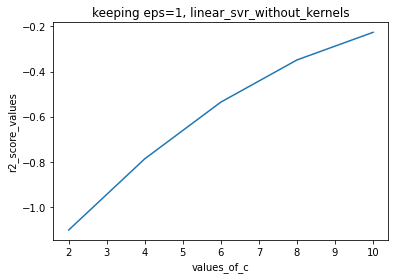

In [166]:
plt.plot(c_1,scores_1)
plt.xlabel('values_of_c')
plt.ylabel('r2_score_values')
plt.title('keeping eps=1, linear_svr_without_kernels')

#### we can clearly see r2 score is increasing when we are increasing value of 'c'

## implementing using kernel functions

In [59]:
from sklearn.svm import SVR
def kernel_functions(X_train, Y_train,X_test, kernel_type,eps,reg_param, gamma):  
    if(kernel_type ==1 ):
        regressor = SVR(kernel='linear', epsilon=eps, C=reg_param)#linear kernel
        regressor.fit(X_train,Y_train)
        y_pred=regressor.predict(X_test)
    elif(kernel_type ==2) :
        regressor= SVR(kernel = 'rbf', epsilon = eps, C= reg_param, gamma=gamma)#rbf kernel
        regressor.fit(X_train,Y_train)
        y_pred=regressor.predict(X_test)
    return y_pred

### I performed k_fold with 5 splits and then I used rbf as my kernel

In [62]:
cv=KFold(n_splits=5, random_state=None, shuffle=False)
scores=[]
for train_index, test_index in cv.split(X):
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=2, eps=1,reg_param=10, gamma='auto')#calling kernel_functions
    scores.append(r2_score(y_test,y_pred))
print(np.mean(scores))


0.6912435512625782


####  we can clearly see value of r2_score is increased to a greater value when we used rbf kernel .


### predicting r2_score for different values of regularization parameter 'C' keeping epsilon constant (eps=1) and using rbf kernel

In [66]:
c1=[2,4,6,8,10]
scores2=[]
for i in range(len(c1)):
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=2, eps=1,reg_param=c1[i], gamma='auto')#calling kernel_functions
    b1=r2_score(y_test,y_pred)
    scores2.append(b1)
print(scores2)

[0.5535626759030622, 0.6533779685265104, 0.7072737052161095, 0.7356852753258689, 0.7486539374571557]


### plotting r2_score vs different values of 'c

Text(0.5, 1.0, 'keeping eps=1, rbf_kernel')

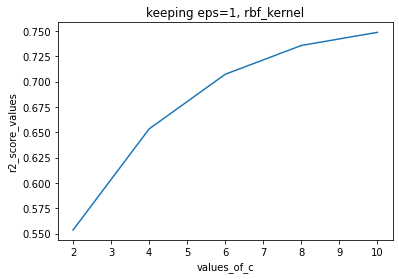

In [73]:
plt.plot(c1,scores2)
plt.xlabel('values_of_c')
plt.ylabel('r2_score_values')
plt.title('keeping eps=1, rbf_kernel')

#### we can clearly see the value of r2_score is increasing when we are increasing the value of regularization parameter 'c' 

### Here i predicted the value of r2_score with different values of epsilon kepping regularization parameter constant(c=4) using rbf kernel

In [76]:
e1=[1,2,3,4,5]
scores3=[]
for i in range(len(e1)):
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=2, eps=e1[i],reg_param=4, gamma='auto')#calling kernel_functions
    b2=r2_score(y_test,y_pred)
    scores3.append(b2)
print(scores3)

[0.6533779685265104, 0.6576729696150323, 0.6552205868624736, 0.6404214200939803, 0.6127026098298678]


## plotting r2_score vs different values of epsilon

Text(0.5, 1.0, 'keeping C=4, rbf_kernel')

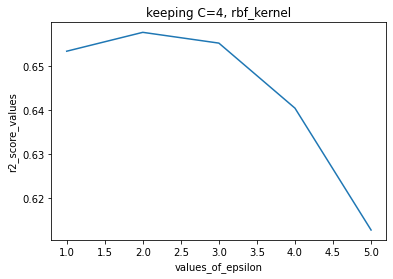

In [78]:
plt.plot(e1,scores3)
plt.xlabel('values_of_epsilon')
plt.ylabel('r2_score_values')
plt.title('keeping C=4, rbf_kernel')

### Here I performed k-fold with 5 splits and then used linear kernel

In [81]:
cv=KFold(n_splits=5, random_state=None, shuffle=False)
linear_kernel_scores=[]
for train_index, test_index in cv.split(X):
    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=1, eps=1,reg_param=2,gamma=0)#calling kernel_functions
    linear_kernel_scores.append(r2_score(y_test,y_pred))
print(np.mean(linear_kernel_scores))


0.4788636775303702


#### Here linear kernel performed well for C=2 and we got good r2_score value

### predicting r2_score values for linear kernel with different values of regularization parameter and kepping epsilon (eps=1)constant

In [83]:
c2=[2,4,6,8,10]
scores4=[]
for i in range(len(c2)):
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=1, eps=1,reg_param=c2[i], gamma=0)#calling kernel functions
    b3=r2_score(y_test,y_pred)
    scores4.append(b3)
print(scores4)

[0.4636019327107721, -0.2095546099139456, -0.4172761198785637, -3.753010572708132, -0.9291287440991234]


#### we can see that linear kernel is not perfoming well with different values of c

### plotting r2_score vs different values of C

Text(0.5, 1.0, 'keeping eps=1, linear_kernel')

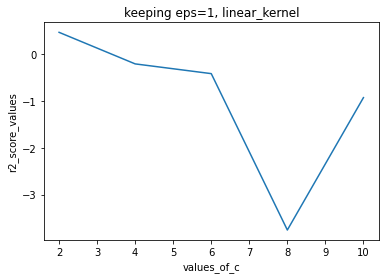

In [84]:
plt.plot(c2,scores4)
plt.xlabel('values_of_c')
plt.ylabel('r2_score_values')
plt.title('keeping eps=1, linear_kernel')

### predicting r2_score values for different values of epsilon with C(c=2) as constant

In [85]:
e2=[1,2,3,4,5]
scores5=[]
for i in range(len(e1)):
    y_pred=kernel_functions(X_train,y_train,X_test, kernel_type=1, eps=e2[i],reg_param=2, gamma=0)
    b4=r2_score(y_test,y_pred)
    scores5.append(b4)
print(scores5)

[0.4636019327107721, 0.39331556463086514, 0.2185267478123346, 0.3519601616017447, 0.28655284063631603]


### plotting r2_score vs different values of epsilon

Text(0.5, 1.0, 'keeping C=2, linear_kernel')

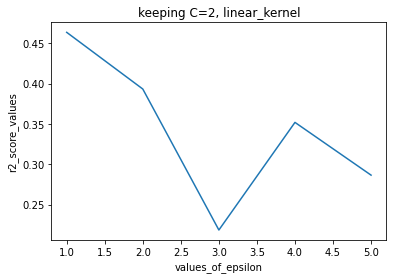

In [86]:
plt.plot(e2,scores5)
plt.xlabel('values_of_epsilon')
plt.ylabel('r2_score_values')
plt.title('keeping C=2, linear_kernel')

### with rbf kernel we got r2_score value of 0.75 which is the best value so far. We can finally conclude that rbf  kernel performed better than linear kernel svr and svr without any kernels.